In [1]:
import pandas as pd
credit = pd.read_csv('../data/credit_final.csv')
credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [2]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

In [3]:
feature_columns = list(credit.columns.difference(['credit.rating']))
X = credit[feature_columns]
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(700, 20) (300, 20) (700,) (300,)


In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

pred = clf.predict(x_test)

cm = confusion_matrix(y_test, pred)

pre = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)

print(cm)
print()
print(
'''
정확도 \t{:.2f}%
정밀도 \t{:.2f}%
재현율 \t{:.2f}%
f1 \t{:.2f}%
'''.format(acc *100, pre*100, rec*100, f1*100))

[[ 28  62]
 [ 25 185]]


정확도 	71.00%
정밀도 	74.90%
재현율 	88.10%
f1 	80.96%



In [6]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.31      0.39        90
           1       0.75      0.88      0.81       210

    accuracy                           0.71       300
   macro avg       0.64      0.60      0.60       300
weighted avg       0.68      0.71      0.68       300



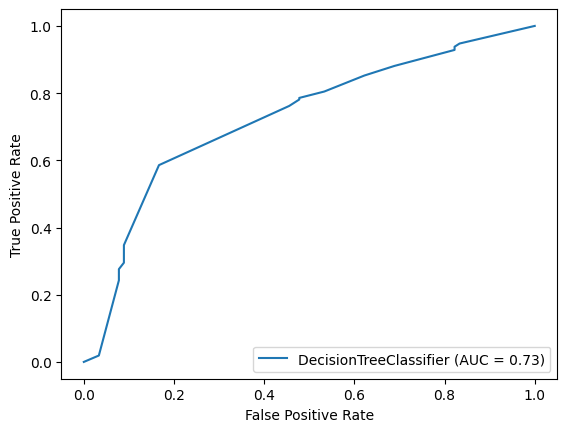

ROC AUC Scoe : 0.7264285714285714


In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score
plot_roc_curve(clf, x_test, y_test)
plt.show()
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
print('ROC AUC Scoe :', roc_auc)

In [8]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(X.columns)
feature_importances = pd.concat([column_nm,
                                pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm', 'importances']
feature_importances

,feature_nm,importances
0,account.balance,0.263282
1,age,0.097293
2,apartment.type,0.036866
3,bank.credits,0.000000
4,credit.amount,0.098532
5,credit.duration.months,0.187908
6,credit.purpose,0.059083
7,current.assets,0.000000
8,dependents,0.000000
9,employment.duration,0.000000


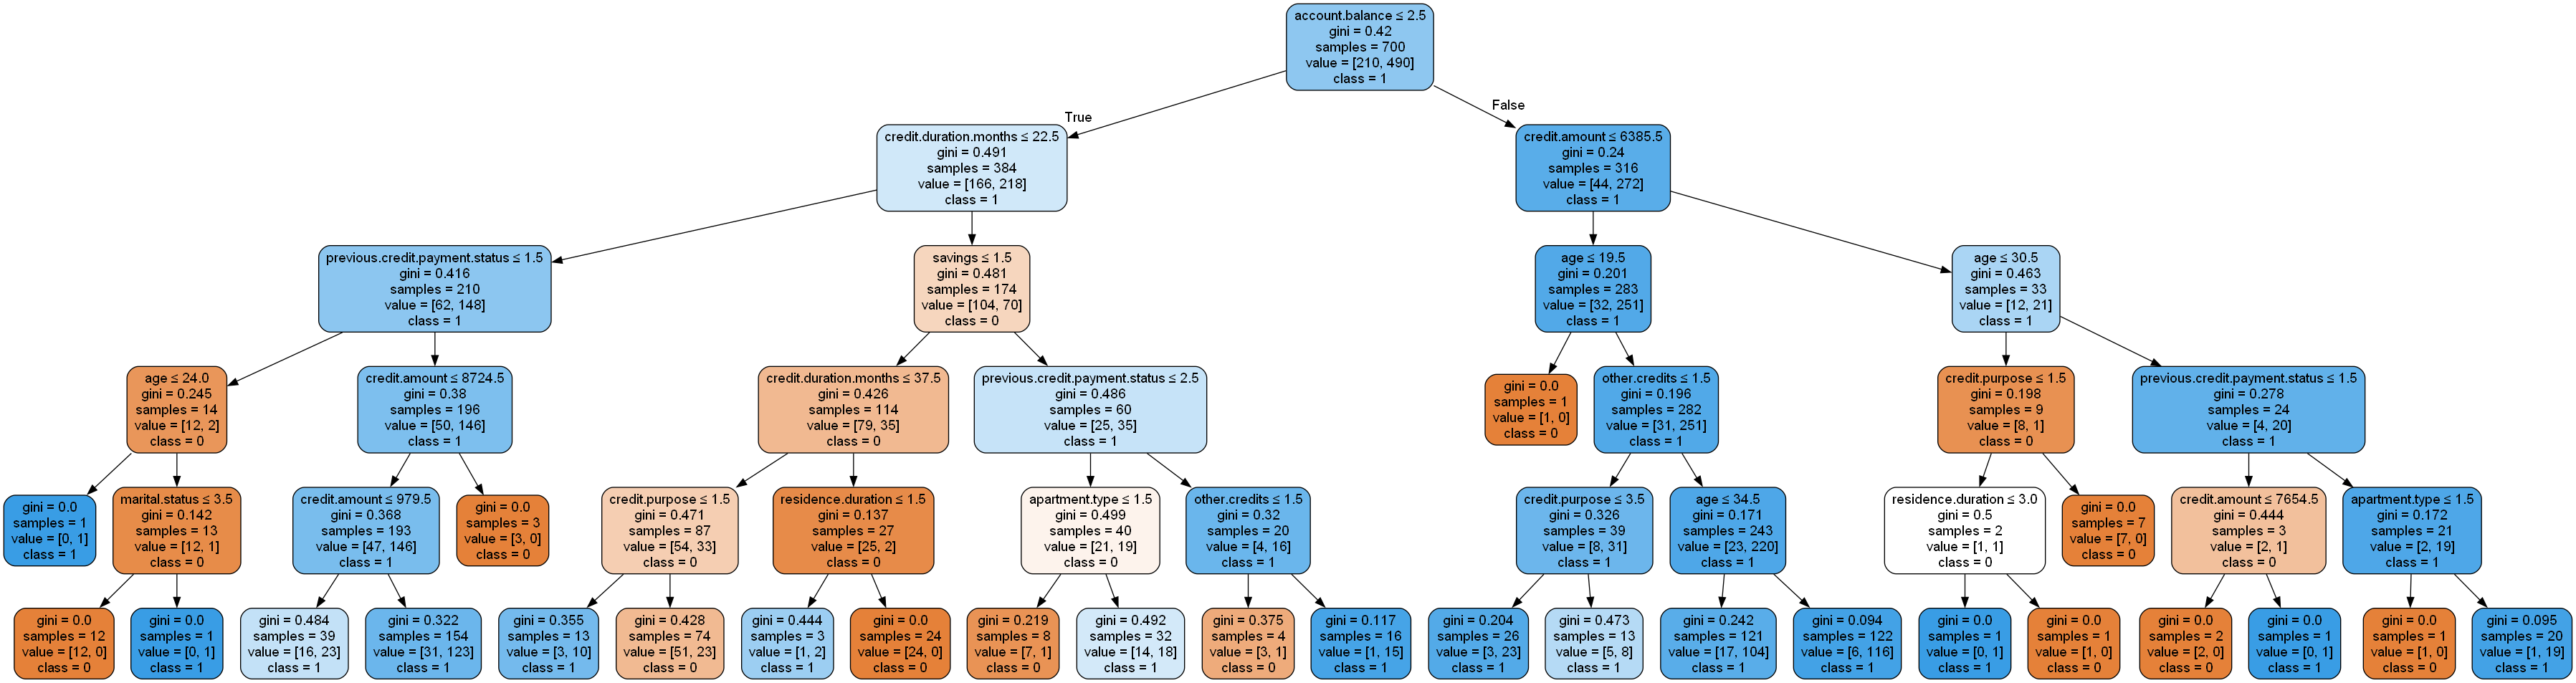

In [9]:
import numpy as np
feature_names = feature_columns
target_names = np.array(['0', '1'])

import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
dt_dot_data = export_graphviz(clf, feature_names = feature_names,
                             class_names = target_names,
                             filled=True, rounded=True,
                             special_characters=True)

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

from IPython.display import Image
Image(dt_graph.create_png())

## DecisionTree Regressor 

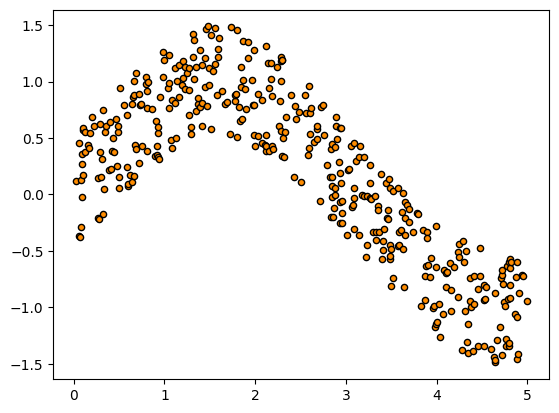

In [11]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.sort(5 * np.random.rand(400, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

y[::1] += 1 * (0.5 - np.random.rand(400))
plt.scatter(X, y, s=20, edgecolor='black', c='darkorange', label='data')

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(280, 1) (120, 1) (280,) (120,)


In [13]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_1 = regr_1.fit(x_train, y_train).predict(x_test)
y_2 = regr_2.fit(x_train, y_train).predict(x_test)

preds = [y_1, y_2]
weights = ['max_depth = 2', 'max_depth = 5']
evals = ['mse', 'rmse', 'mae']
results = pd.DataFrame(index=weights, columns=evals)

for pred, nm in zip(preds, weights):
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse'] = round(mse, 2)
    results.loc[nm]['mae'] = round(mae, 2)    
    results.loc[nm]['rmse'] = round(rmse, 2)    

results

,mse,rmse,mae
max_depth = 2,0.12,0.35,0.29
max_depth = 5,0.12,0.35,0.3


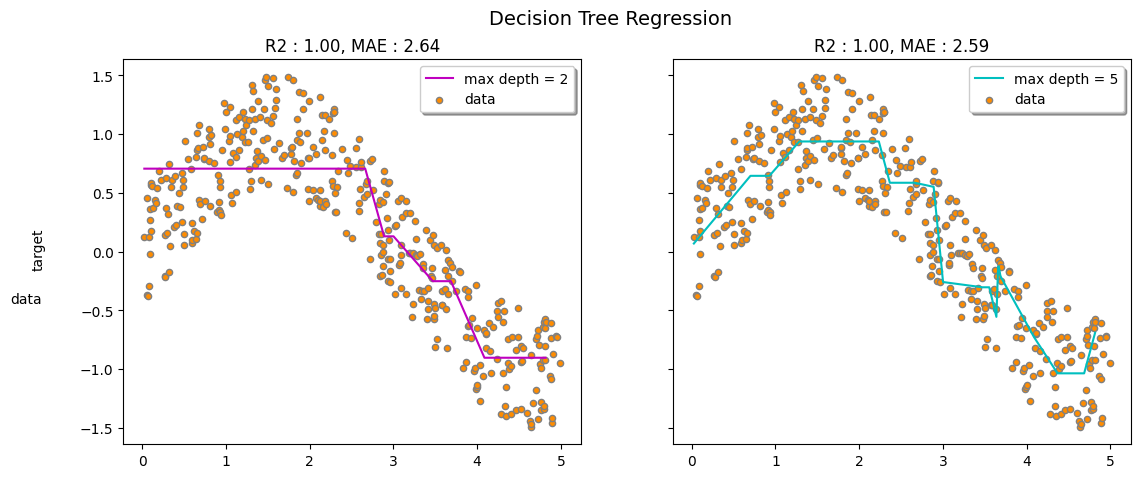

In [18]:
X_test = np.sort(5* np.random.rand(40, 1), axis=0)

regrs = [regr_1, regr_2]
depths = ['max depth = 2', 'max depth = 5']
model_color = ['m', 'c']
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(13, 5))

for ix, regr in enumerate(regrs):
    pred = regr.fit(X, y).predict(X_test)
    r2 = regr.score(X_test, pred)
    mae = mean_absolute_error(X_test, pred)
    
    axes[ix].plot(X_test,
                 pred,
                 color=model_color[ix],
                 label='{}'.format(depths[ix])
                 )
    axes[ix].scatter(X, y,
                    s=20,
                     edgecolor='gray',
                     c='darkorange',
                     label='data'
                    )
    axes[ix].legend(loc='upper right',
                   ncol=1,
                   fancybox=True,
                   shadow=True)
    axes[ix].set_title('R2 : {r:.2f}, MAE : {m:.2f}'.format(r=r2, m=mae))
    
fig.text(0.05, 0.4, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle('Decision Tree Regression', fontsize=14)
plt.show()